## Problem 1 : Clustering based on Sepal vs Petal

In [8]:
#Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [9]:
iris = pd.read_csv("iris.csv")
iris

,sepalLength,sepalWidth,petalLength,petalWidth,flowerClass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## We first do clustering on the sepal features.

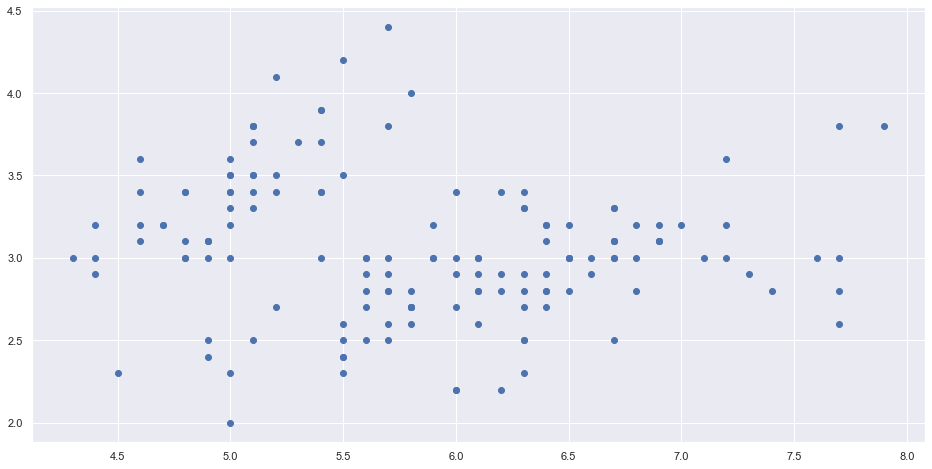

In [10]:
# Extract Features from the Data
X = pd.DataFrame(iris[['sepalLength','sepalWidth']])

# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "sepalLength", y = "sepalWidth", data = X)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


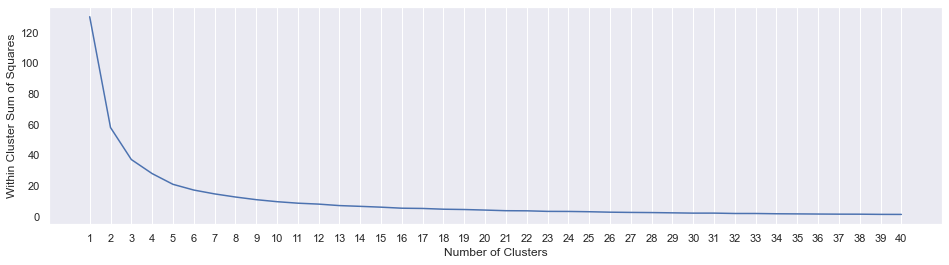

In [11]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

From the elbow plot above, we can see that the within cluster sum of squares decrease in a linear fashion after n = 3. Therefore, we pick the optimal cluster number as 3.

In [12]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Number of cluster
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

We print the cluster centers here.

In [13]:
# Print the Cluster Centers
print("Features", "\tsepalLength", "\tsepalWidth")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	sepalLength 	sepalWidth

Cluster 0:	5.01	3.42	
Cluster 1:	6.81	3.07	
Cluster 2:	5.77	2.69	


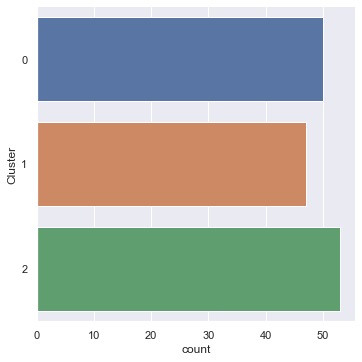

In [14]:
#Distribution of clusters using count plot

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

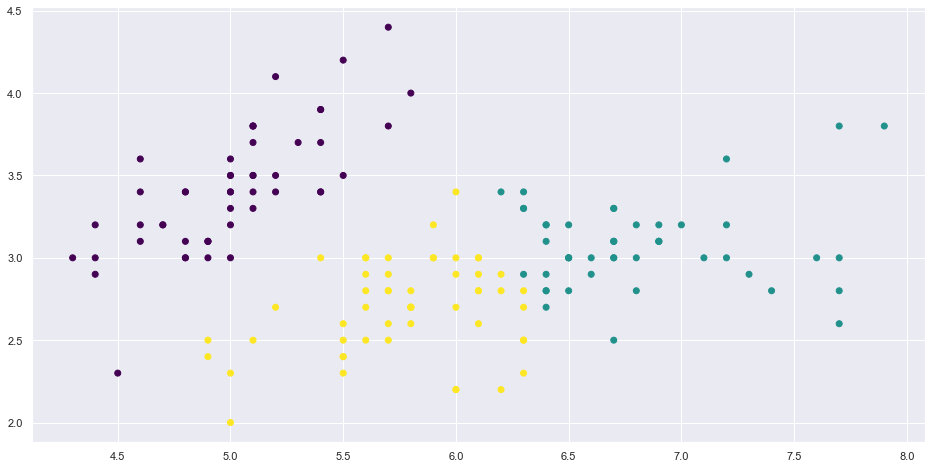

In [15]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "sepalLength", y = "sepalWidth", c = "Cluster", cmap = 'viridis', data = X_labeled)

## We now do clustering on the sepal features.

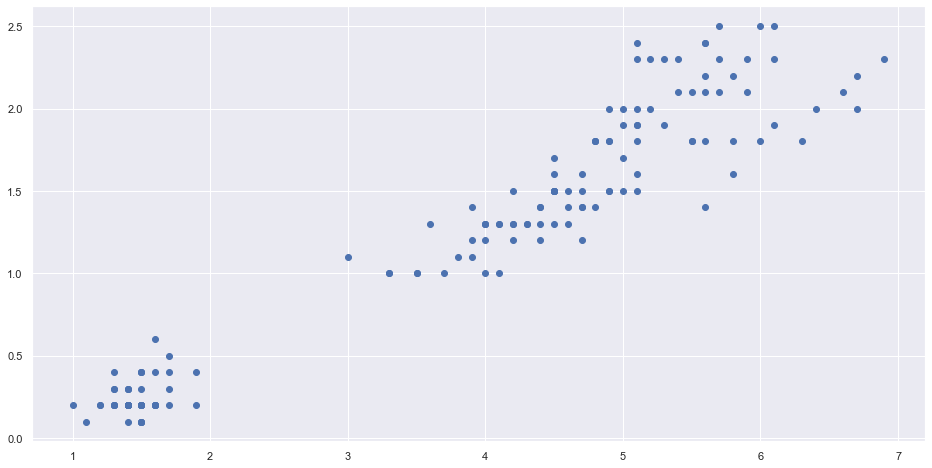

In [16]:
# Extract Features from the Data
petal = pd.DataFrame(iris[['petalLength','petalWidth']])

# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "petalLength", y = "petalWidth", data = petal)

In the figure above, it seems like it has only 2 clusters. We guess there are 2 clusters.

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


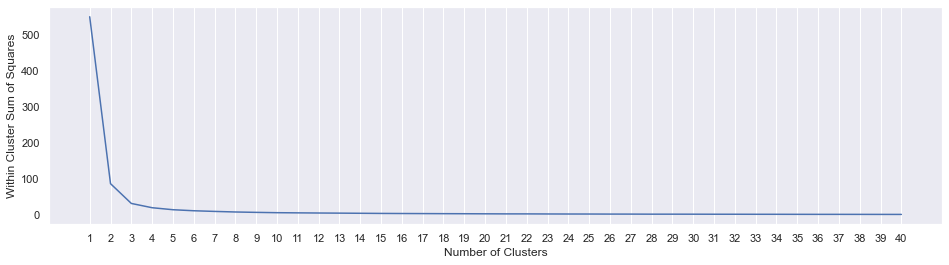

In [17]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Vary the Number of Clusters
min_clust = 1
max_clust = 40

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust)
    kmeans.fit(petal)
    within_ss.append(kmeans.inertia_)

# Plot Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

Similar to the elbow plot above, we see that the elbow point of the plot is n = 3. We set our optimal number of clusters to be 3.

In [18]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=3)

In [19]:
# Print the Cluster Centers
print("Features", "\tpetalLength", "\tpetalWidth")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()

Features 	petalLength 	petalWidth

Cluster 0:	5.01	3.42	
Cluster 1:	6.81	3.07	
Cluster 2:	5.77	2.69	


D:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- petalLength
- petalWidth
Feature names seen at fit time, yet now missing:
- sepalLength
- sepalWidth

  warnings.warn(message, FutureWarning)


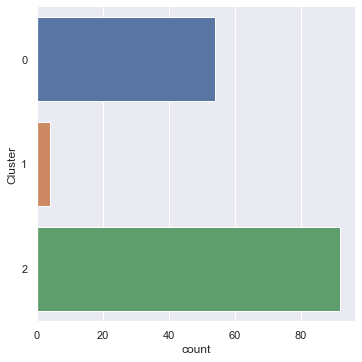

In [20]:
#Distribution of clusters using count plot

# Predict the Cluster Labels
labels = kmeans.predict(petal)

# Append Labels to the Data
X_labeled = petal.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

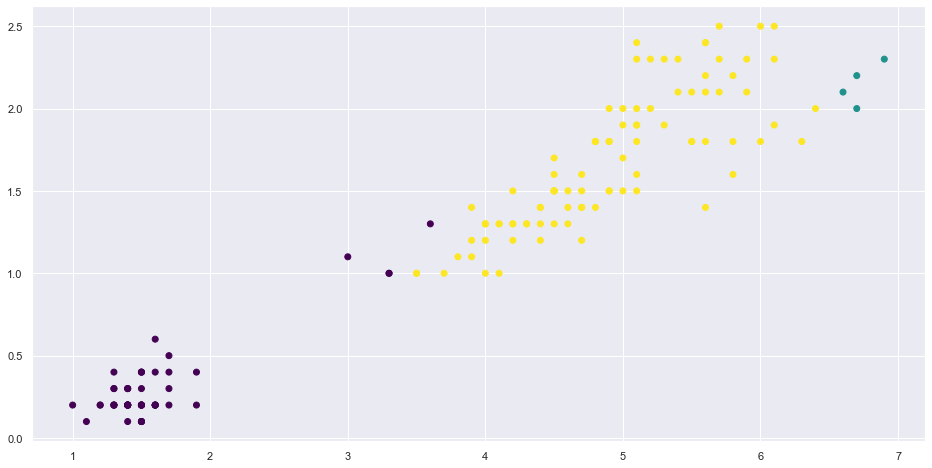

In [21]:
# Visualize the Clusters in the Data
f = plt.figure(figsize=(16,8))
plt.scatter(x = "petalLength", y = "petalWidth", c = "Cluster", cmap = 'viridis', data = X_labeled)

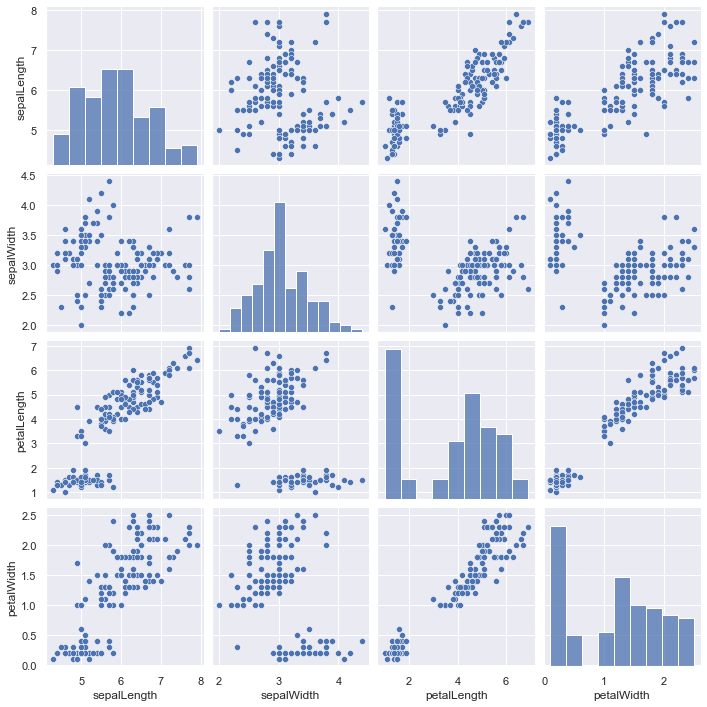

In [22]:
sb.pairplot(iris)

Acccording to the pairplot above, we see that the pair features "petalLength" and "petalWidth" has the highest between clusters sum of squares and the lowest within clusters sum of squares (visually). If we pick this two as our features, we can have a clear cut on our dataset for clustering.

# Problem 2 : Anomaly Detection based on Sepal vs Petal

## We first do anomaly detection on sepal features.

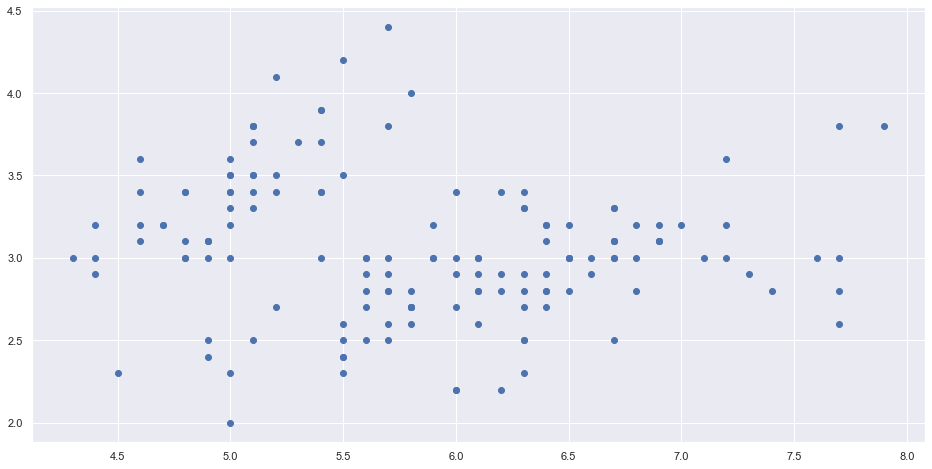

In [23]:
# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "sepalLength", y = "sepalWidth", data = X)

In [24]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(contamination=0.05)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

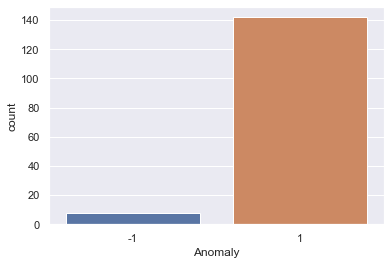

In [25]:
# Predict the Anomalies
labels = lof.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

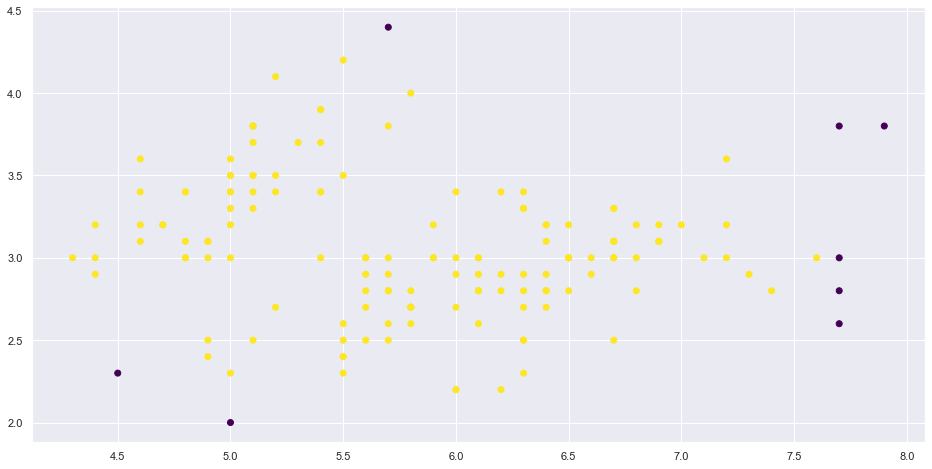

In [26]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "sepalLength", y = "sepalWidth", c = "Anomaly", cmap = 'viridis', data = X_labeled)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sepalWidth', ylabel='Anomaly'>

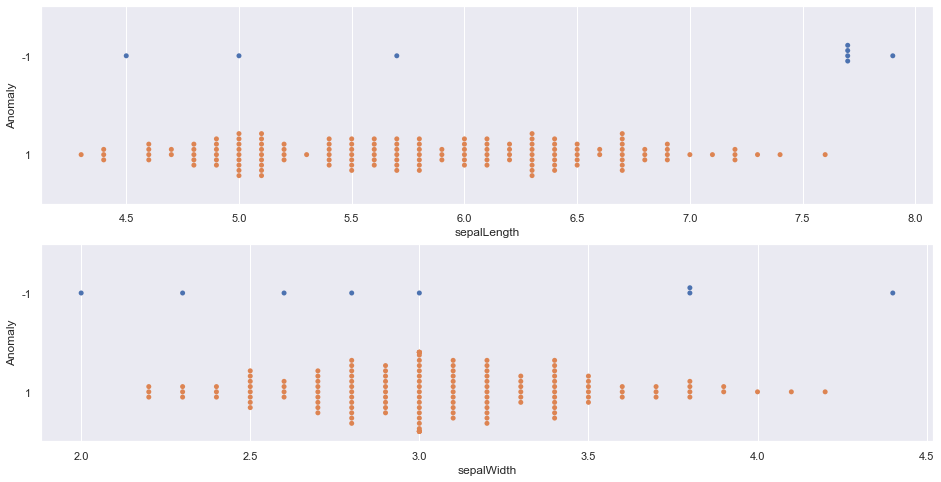

In [27]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))

sb.swarmplot(x = "sepalLength", y = "Anomaly", data = X_labeled, ax = axes[0])
sb.swarmplot(x = "sepalWidth", y = "Anomaly", data = X_labeled, ax = axes[1])

## We then do anomaly detection on Petal Features.

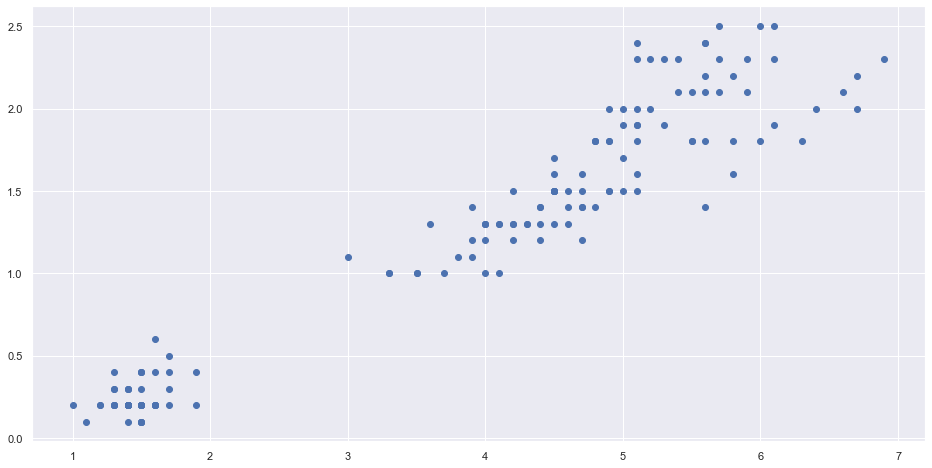

In [28]:
# Plot the Raw Data on a 2D grid
f = plt.figure(figsize=(16,8))
plt.scatter(x = "petalLength", y = "petalWidth", data = petal)

In [29]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(petal)

LocalOutlierFactor(contamination=0.05)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

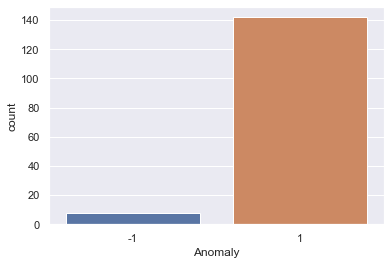

In [30]:
# Predict the Anomalies
labels = lof.fit_predict(petal)

# Append Labels to the Data
X_labeled = petal.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

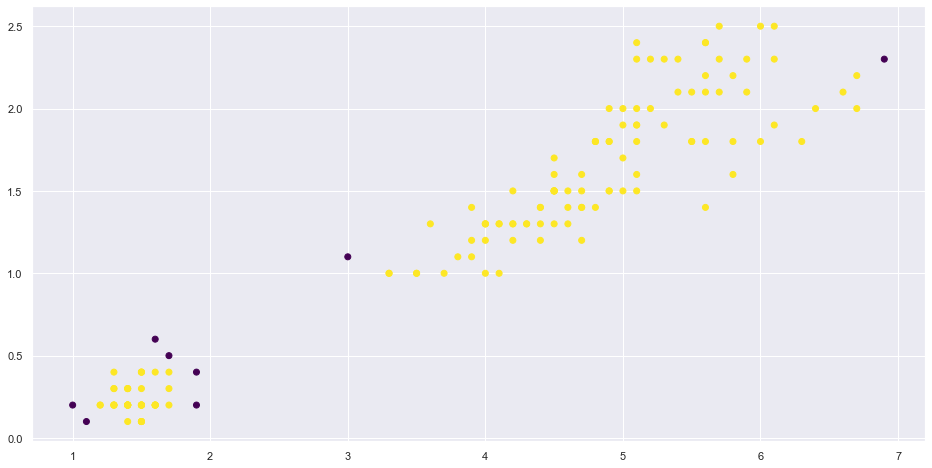

In [31]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "petalLength", y = "petalWidth", c = "Anomaly", cmap = 'viridis', data = X_labeled)

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='petalWidth', ylabel='Anomaly'>

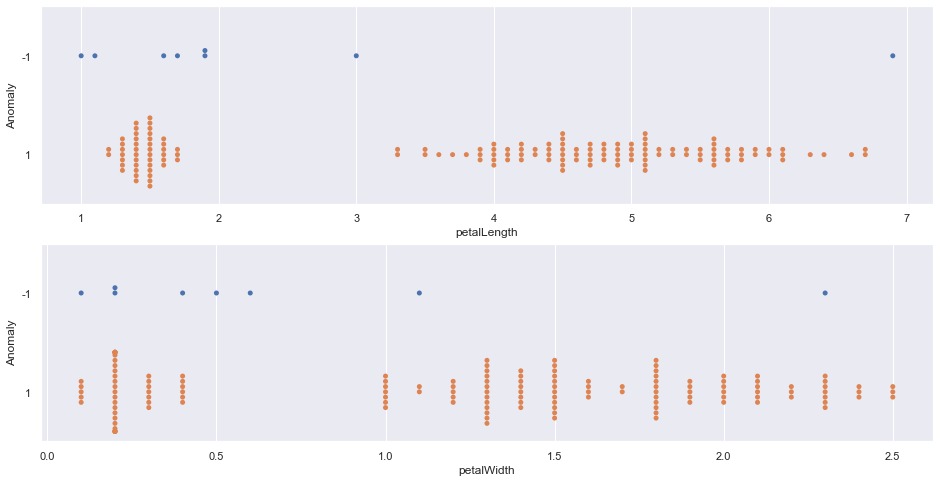

In [32]:
# Boxplots for the Features for the Anomalies
f, axes = plt.subplots(2, 1, figsize=(16,8))
sb.swarmplot(x = 'petalLength', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.swarmplot(x = 'petalWidth', y = 'Anomaly', data = X_labeled, ax = axes[1])

According to the anomaly plot in above, we see that it seems like sepalLength and sepalWidth are the two best features in detecting anomalies. From the visual above, the plot for sepalLength and sepalWidth clearly plots the anomalies as they are quite far off from the clusters. But on the other hand for the anomalies plot for "petalLength" and "petalWidth",the anomalies it detected is quite near to the clusters, it might not be clear why the model detect it as an anomaly.

We conclude that sepalLength and sepalWidth are better in detecting anomalies.

# Problem 3 : Try out something new!

In [60]:
# We choose a new clustering algorithm 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

newpetal = pd.DataFrame(iris[['petalLength','petalWidth']])

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(newpetal)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

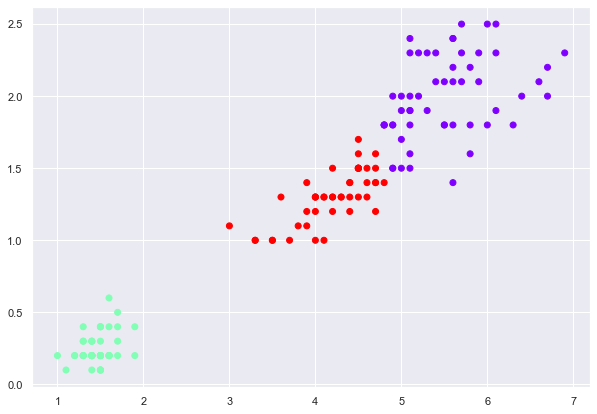

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(newpetal.iloc[:,0], newpetal.iloc[:,1] ,c=cluster.labels_, cmap='rainbow')

In [59]:
# Calculate Silhoutte Score
#
score = silhouette_score(petal, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.508


In [62]:
# Calculate Silhoutte Score
#
score = silhouette_score(petal, cluster.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.657


After comparing the silhouette score for both, we see that Agglomerative Clustering is a better clustering model for this particular dataset on the two best feature. The closer the silhouette score is to 1, the better( or more compact) the datapoints is to the cluster. 

We conclude that the agglomerative clustering model is better than K-means in terms of clustering the two best features mentioned above, with a silhouette score of 0.657.

## We now use a new model for anomaly detection.

In [63]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=10, warm_start=True)
clf.fit(X)  # fit 10 trees  
clf.set_params(n_estimators=20)  # add 10 more trees  
clf.fit(X)  # fit the added trees  

IsolationForest(n_estimators=20, warm_start=True)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_bagging.py:374: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Anomaly', ylabel='count'>

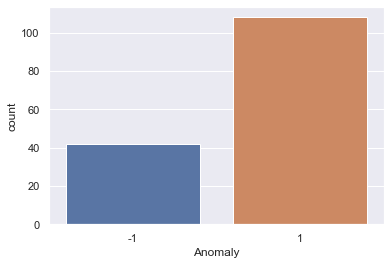

In [64]:
# Predict the Anomalies
labels = clf.fit_predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

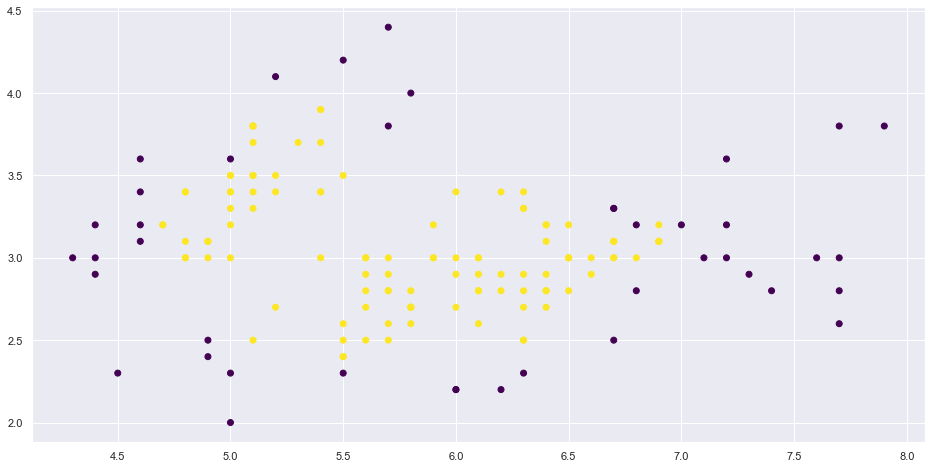

In [65]:
# Visualize the Anomalies in the Data
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "sepalLength", y = "sepalWidth", c = "Anomaly", cmap = 'viridis', data = X_labeled)

After using a new anomaly detection model, we see that there are now more anomalies detected. But we cant say for sure this is correct. Lets use some sort of metrics to see, which detection offers better results.